In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [138]:

df = pd.read_excel("all_schedules.xlsx")


df['team'] = df['team'].astype(str)
df['Opponent'] = df['Opponent'].astype(str)

#ignore comments in this cell

# create new column with sorted team names
#df['matchup'] = df.apply(lambda row: '-'.join(sorted([row['team'], row['Opponent']])), axis=1)

# create unique identifier for each matchup
#df['matchup_id'] = df['New Date'].astype(str) + '-' + df['team']

# drop duplicate rows based on matchup_id
#df = df.drop_duplicates(subset='matchup_id')

# drop matchup and matchup_id columns
#df = df.drop(columns=['matchup', 'matchup_id']) #filter out games that are repeated on the same day... do we need to do this?


df

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,35,"Sun,",2023-03-19,CBI,N,Eastern Kentucky,A-Sun,-2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Cleveland St.,cleveland-state,0,2023
57805,31,"Sun,",2023-03-19,CBI,N,Milwaukee,Horizon,-4.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Stetson,stetson,0,2023
57806,34,"Sun,",2023-03-19,CBI,N,Tarleton State,WAC,-0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Radford,radford,0,2023
57807,34,"Sun,",2023-03-19,CBI,N,Duquesne,A-10,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Rice,rice,0,2023


In [139]:
df.head()

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016


In [140]:
team_stats = pd.read_excel("all_cbb_data.xlsx")
team_stats = team_stats.iloc[:, : 24]



In [141]:
merged = pd.merge(df,team_stats, how='inner',left_on=['team'],right_on=['TEAM'])
merged


,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Year_y
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN,2016
1,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,44.3,50.7,52.1,37.1,36.1,67.1,-12.500000,NaN,NaN,2017
2,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,43.2,51.9,52.3,31.8,33.2,69.8,-11.300000,NaN,NaN,2018
3,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,38.3,49.5,49.8,37.7,33.3,67.1,-2.600000,R64,15.0,2019
4,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.062883,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287036,29,"Sun,",2023-02-19,REG,H,Central Arkansas,A-Sun,-13.59,W,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.102877,NaN,NaN,2023
287037,30,"Wed,",2023-02-22,REG,A,Jacksonville,A-Sun,-6.19,W,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.102877,NaN,NaN,2023
287038,31,"Fri,",2023-02-24,REG,A,North Florida,A-Sun,-6.58,L,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.102877,NaN,NaN,2023
287039,32,"Mon,",2023-02-27,CTOURN,N,North Florida,A-Sun,-6.58,W,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.102877,NaN,NaN,2023


Training Set and Testing set will be filtered to correct features and values in later steps

In [142]:
#training_set = merged.loc[merged["Year_y"] == 2016]
#training_set.sort_values("New Date")
training_set = merged
training_set

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Year_y
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN,2016
1,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,44.3,50.7,52.1,37.1,36.1,67.1,-12.500000,NaN,NaN,2017
2,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,43.2,51.9,52.3,31.8,33.2,69.8,-11.300000,NaN,NaN,2018
3,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,38.3,49.5,49.8,37.7,33.3,67.1,-2.600000,R64,15.0,2019
4,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.062883,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287036,29,"Sun,",2023-02-19,REG,H,Central Arkansas,A-Sun,-13.59,W,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.102877,NaN,NaN,2023
287037,30,"Wed,",2023-02-22,REG,A,Jacksonville,A-Sun,-6.19,W,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.102877,NaN,NaN,2023
287038,31,"Fri,",2023-02-24,REG,A,North Florida,A-Sun,-6.58,L,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.102877,NaN,NaN,2023
287039,32,"Mon,",2023-02-27,CTOURN,N,North Florida,A-Sun,-6.58,W,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-10.102877,NaN,NaN,2023


In [143]:
testing_set = merged


In [144]:
#test = df
training_set["Winner"] = np.where(training_set['W/L'] == 'W', training_set['team'], training_set['Opponent'])
training_set = training_set.dropna()
training_set.head()

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Year_y,Winner
18,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,49.5,49.8,37.7,33.3,67.1,-2.6,R64,15.0,2019,Colorado State
188,7,"Sat,",2016-12-03,REG,A,Charleston Southern,Big South,-12.28,W,85.0,...,49.5,49.8,37.7,33.3,67.1,-2.6,R64,15.0,2019,Abilene Christian
203,10,"Sat,",2016-12-17,REG,A,Sacramento State,Big Sky,-10.69,L,86.0,...,49.5,49.8,37.7,33.3,67.1,-2.6,R64,15.0,2019,Sacramento State
258,21,"Wed,",2017-02-01,REG,H,New Orleans,Southland,-4.10,W,70.0,...,49.5,49.8,37.7,33.3,67.1,-2.6,R64,15.0,2019,Abilene Christian
323,5,"Fri,",2017-11-24,REG,A,Campbell,Big South,-5.68,W,85.0,...,49.5,49.8,37.7,33.3,67.1,-2.6,R64,15.0,2019,Abilene Christian


SELECT FEATURES FOR TRAINING SET HERE

In [146]:
training_set = training_set[['team', 'Opponent', "Winner", "W/L","Margin", "SRS", 'Site', "Year_y", "Type"]]
print(len(training_set))
training_set.head()
training_set.reset_index(drop=True, inplace=True)

training_set.head()

2465


,team,Opponent,Winner,W/L,Margin,SRS,Site,Year_y,Type
0,Abilene Christian,Colorado State,Colorado State,L,-8,2.31,A,2019,REG
1,Abilene Christian,Charleston Southern,Abilene Christian,W,3,-12.28,A,2019,REG
2,Abilene Christian,Sacramento State,Sacramento State,L,-2,-10.69,A,2019,REG
3,Abilene Christian,New Orleans,Abilene Christian,W,1,-4.10,H,2019,REG
4,Abilene Christian,Campbell,Abilene Christian,W,5,-5.68,A,2019,REG


After label encoding in the next steps, split the dataset into training and testing sets based on the year

In [147]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #label encode anything that is a string... any new added features will need to be encoded
converted_season = training_set
converted_season["team"]=encoder.fit_transform(training_set["team"])
converted_season["Opponent"]=encoder.fit_transform(training_set["Opponent"])

converted_season["Site"]=encoder.fit_transform(training_set["Site"]) #if site is 1 then it is a home game, 2 is neutral, 3 is away
#converted_season["Winner"]=encoder.fit_transform(small["Winner"])



converted_season.head()

,team,Opponent,Winner,W/L,Margin,SRS,Site,Year_y,Type
0,0,63,Colorado State,L,-8,2.31,0,2019,REG
1,0,52,Abilene Christian,W,3,-12.28,0,2019,REG
2,0,265,Sacramento State,L,-2,-10.69,0,2019,REG
3,0,211,Abilene Christian,W,1,-4.10,1,2019,REG
4,0,46,Abilene Christian,W,5,-5.68,0,2019,REG


In [148]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['team'], converted_season['Opponent'])
# changes the winner column to match up with the encoded winner

converted_season.head()

,team,Opponent,Winner,W/L,Margin,SRS,Site,Year_y,Type
0,0,63,63,L,-8,2.31,0,2019,REG
1,0,52,0,W,3,-12.28,0,2019,REG
2,0,265,265,L,-2,-10.69,0,2019,REG
3,0,211,0,W,1,-4.10,1,2019,REG
4,0,46,0,W,5,-5.68,0,2019,REG


In [149]:
converted_season = converted_season.drop(columns=["W/L"])

converted_season.head()

,team,Opponent,Winner,Margin,SRS,Site,Year_y,Type
0,0,63,63,-8,2.31,0,2019,REG
1,0,52,0,3,-12.28,0,2019,REG
2,0,265,265,-2,-10.69,0,2019,REG
3,0,211,0,1,-4.10,1,2019,REG
4,0,46,0,5,-5.68,0,2019,REG


In [150]:
converted_season.loc[converted_season["team"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["team"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost



converted_season.head()

,team,Opponent,Winner,Margin,SRS,Site,Year_y,Type,team_game_win
0,0,63,63,-8,2.31,0,2019,REG,1.0
1,0,52,0,3,-12.28,0,2019,REG,2.0
2,0,265,265,-2,-10.69,0,2019,REG,1.0
3,0,211,0,1,-4.10,1,2019,REG,2.0
4,0,46,0,5,-5.68,0,2019,REG,2.0


CORRELATION MATRIX


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: C:\Users\divys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


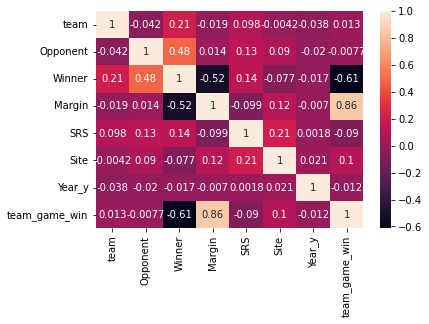

In [151]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

FEATURES ARE NOT THAT CORREALTED EXCEPT FOR MARGIN AND TEAM_GAME_WIN... MAY NEED TO ADD DIFFERENT STATISTICS

TRAINING DATA will be set to entire 2016 season and testing data will be set to 2017 NCAA tournament games

In [152]:
training_set = converted_season.loc[converted_season["Year_y"] == 2016] # training set 
testing_set = converted_season.loc[(converted_season["Year_y"] == 2017) & (converted_season["Type"] == "NCAA")] # testing set

training_set = training_set.drop(["Year_y", "Type"], axis=1) #drop year and type as they are not used for predictions only for data selection
testing_set = testing_set.drop(["Year_y", "Type"], axis=1)

X_train=training_set.drop(["team_game_win"],axis=1).values
X_test = testing_set.drop(["team_game_win"],axis=1).values


print(len(X_train))
print(len(X_test))
X_train


615
11


array([[  2.  , 280.  ,   2.  ,   2.  ,  -4.67,   2.  ],
       [  2.  , 293.  , 293.  ,  -2.  ,  13.52,   0.  ],
       [  2.  , 242.  , 242.  ,  -6.  ,  18.05,   2.  ],
       ...,
       [ 36.  , 317.  ,  36.  ,   5.  ,  13.96,   2.  ],
       [ 36.  , 218.  ,  36.  ,   6.  ,  -7.63,   1.  ],
       [ 36.  , 271.  , 271.  ,  -8.  ,  18.07,   0.  ]])

In [153]:
Y_train=training_set["team_game_win"].values
Y_test = testing_set["team_game_win"].values
Y_train=Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

Y_train

array([[2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],

In [154]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVM CODE

In [155]:
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto")
svm_clf.fit(X_train,Y_train)

C:\Users\divys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [156]:
Y_pred=svm_clf.predict(X_test)
print("Acurracy of our model is :")
accuracy_score(Y_test,Y_pred)

Acurracy of our model is :


0.9090909090909091